In [5]:
import numpy as np
import statsmodels as sm

# Generate some example time series data
behave_series = np.random.rand(100)
neural_series = np.random.rand(100)

# Choose the model order
model_order = 2

# Fit the autoregressive models
behave_model = sm.tsa.ar_model.AutoReg(behave_series, lags=model_order, trend='n').fit()
neural_model = sm.tsa.ar_model.AutoReg(neural_series, lags=model_order, trend='n').fit()

# Compute the residuals
behave_resid = behave_model.resid[model_order:]
neural_resid = neural_model.resid[model_order:]

# Concatenate the residuals into a matrix
resid_matrix = np.column_stack((behave_resid, neural_resid))

# Test for Granger causality
granger_test = sm.tsa.stattools.grangercausalitytests(resid_matrix, model_order, verbose=False)

# Print the results
for i in range(1, model_order+1):
    print(f"Lag {i}: p-value = {granger_test[i][0]['ssr_ftest'][1]:.4f}")

Lag 1: p-value = 0.0144
Lag 2: p-value = 0.2046


/home/brooke/anaconda3/envs/ieeg_analysis/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


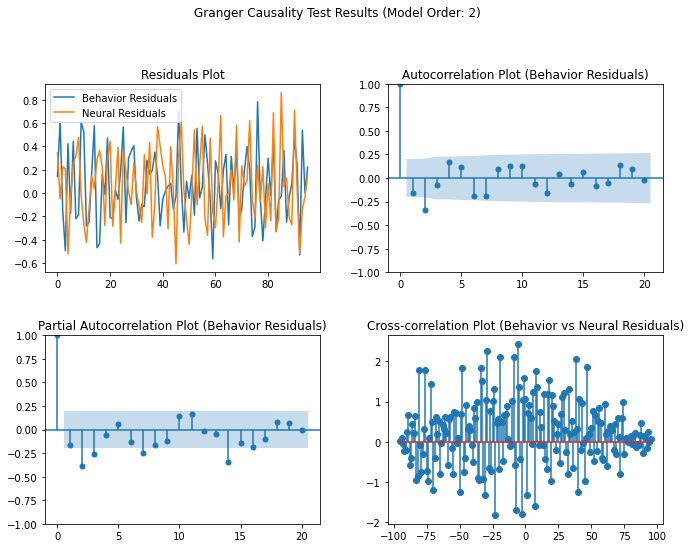

In [19]:
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt

# Generate some example time series data
behave_series = np.random.rand(100)
neural_series = np.random.rand(100)

# Choose the model order
model_order = 2

# Fit the autoregressive models
behave_model = sm.tsa.ar_model.AutoReg(behave_series, lags=model_order, trend='n').fit()
neural_model = sm.tsa.ar_model.AutoReg(neural_series, lags=model_order, trend='n').fit()

# Compute the residuals
behave_resid = behave_model.resid[model_order:]
neural_resid = neural_model.resid[model_order:]

# Concatenate the residuals into a matrix
resid_matrix = np.column_stack((behave_resid, neural_resid))

# Test for Granger causality
granger_test = sm.tsa.stattools.grangercausalitytests(resid_matrix, model_order, verbose=False)

# Create a new figure with multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the residuals of the autoregressive models
axs[0, 0].plot(behave_resid, label='Behavior Residuals')
axs[0, 0].plot(neural_resid, label='Neural Residuals')
axs[0, 0].set_title('Residuals Plot')
axs[0, 0].legend()

# Plot the autocorrelation function of the residuals
sm.graphics.tsaplots.plot_acf(resid_matrix[:, 0], ax=axs[0, 1])
axs[0, 1].set_title('Autocorrelation Plot (Behavior Residuals)')

# Plot the partial autocorrelation function of the residuals
sm.graphics.tsaplots.plot_pacf(resid_matrix[:, 0], ax=axs[1, 0])
axs[1, 0].set_title('Partial Autocorrelation Plot (Behavior Residuals)')

# Plot the cross-correlation function between residuals
cross_corr = np.correlate(behave_resid, neural_resid, mode='full')
lags = np.arange(-len(behave_resid) + 1, len(behave_resid))
axs[1, 1].stem(lags, cross_corr)
axs[1, 1].set_title('Cross-correlation Plot (Behavior vs Neural Residuals)')

# Add a main title and adjust subplot spacing
fig.suptitle(f'Granger Causality Test Results (Model Order: {model_order})')
fig.tight_layout(pad=3.0)

# Show the figure
plt.show()
